In [ ]:
## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [2]:
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 觀察 Age

In [8]:
print(data["Age"].describe())
print("遺失值：",data["Age"].isnull().sum())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
遺失值： 177


<AxesSubplot:xlabel='Age', ylabel='Pclass'>

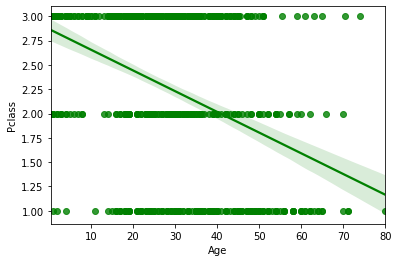

In [10]:
sns.regplot(x="Age", y="Pclass", color="g",data=data)

# 年紀越大艙等越好(數字越小)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

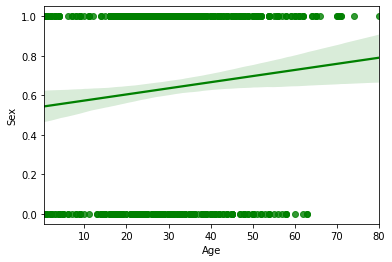

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'],)

sns.regplot(x="Age", y="Sex", color="g",data=data)

# Age 和 Sex 並無關連

In [39]:
data2=pd.DataFrame({"Pclass":data["Pclass"],
                    "Age":data["Age"]})
data2

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [40]:
from sklearn.impute import KNNImputer

data3 = pd.DataFrame(KNNImputer(n_neighbors=1).fit_transform(data2))
data3

,0,1
0,3.0,22.0
1,1.0,38.0
2,3.0,26.0
3,1.0,35.0
4,3.0,35.0
...,...,...
886,2.0,27.0
887,1.0,19.0
888,3.0,22.0
889,1.0,26.0


In [43]:
data["Age"]=data3[1]
print("遺失值：",data["Age"].isnull().sum())
data

遺失值： 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,22.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1
